Matriz A = [[0.992 1.   ]
 [0.008 0.   ]]
Valores propios de A son = [ 1.    -0.008]
Vectores propios de A son = [[ 0.999968   -0.70710678]
 [ 0.00799974  0.70710678]]


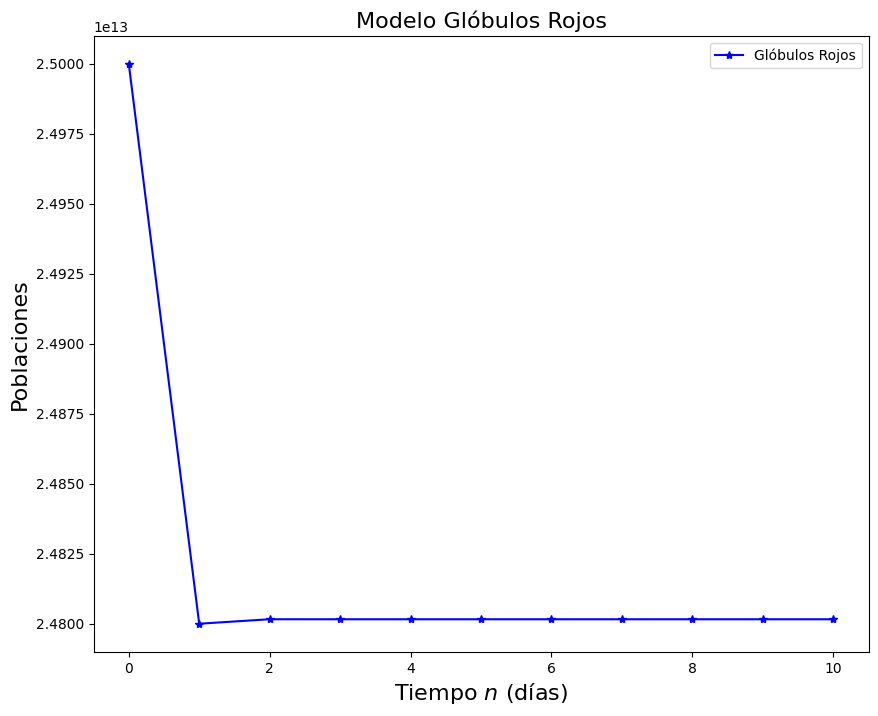

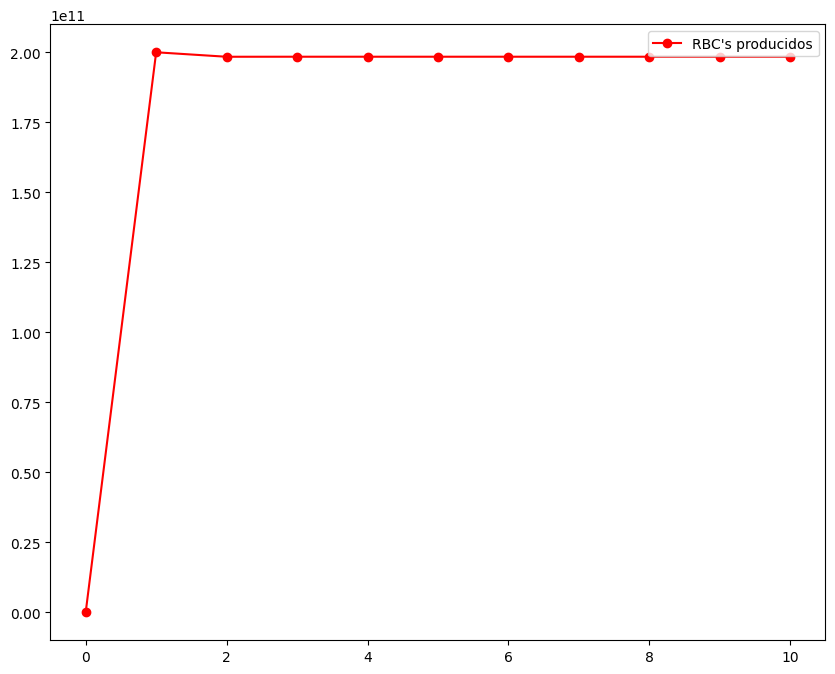

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

##MODELO BASE

##Constantes
x0 = 25*(10**(12))
y0 = 0
gamma = 1
f = 0.008


#Valores Propios Matriz
A = np.array([[(1-f), 1], [gamma*f, 0]])
w,v = eig(A)
print('Matriz A =', A)
print('Valores propios de A son =', w)
print('Vectores propios de A son =', v)

##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    x[i] = res[0]
    y[i] = res[1]


fig, ax = plt.subplots(figsize=[10,8])
#plt.axis([0,10,0,1]) 
plt.plot(n, x, color='blue',marker='*',label='Glóbulos Rojos') # GlobRoj
plt.legend()
plt.title('Modelo Glóbulos Rojos',fontsize='16')
plt.xlabel('Tiempo $n$ (días)',fontsize='16')
plt.ylabel('Poblaciones',fontsize='16')
#ax1.text(5, 0.2, r'$a = {}$'.format(a), fontsize=15)
fig, ax = plt.subplots(figsize=[10,8])
plt.plot(n, y, color='red',marker='o',label='RBC\'s producidos') # CMH
plt.legend()

